In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('../Datasets/icrisat.xlsx')

In [3]:
df.head()

,Year,State,Crop,Cost
0,1967,Chhattisgarh,rice,110.0
1,1968,Chhattisgarh,rice,98.8
2,1969,Chhattisgarh,rice,94.0
3,1970,Chhattisgarh,rice,95.4
4,1971,Chhattisgarh,rice,95.9


In [4]:
df=df[['State','Crop','Year','Cost']]

In [5]:
df.head()

,State,Crop,Year,Cost
0,Chhattisgarh,rice,1967,110.0
1,Chhattisgarh,rice,1968,98.8
2,Chhattisgarh,rice,1969,94.0
3,Chhattisgarh,rice,1970,95.4
4,Chhattisgarh,rice,1971,95.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112805 entries, 0 to 112804
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   State   112805 non-null  object 
 1   Crop    112805 non-null  object 
 2   Year    112805 non-null  int64  
 3   Cost    112805 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [7]:
df.corr()

,Year,Cost
Year,1.000000,0.667275
Cost,0.667275,1.000000


## Data Visualization

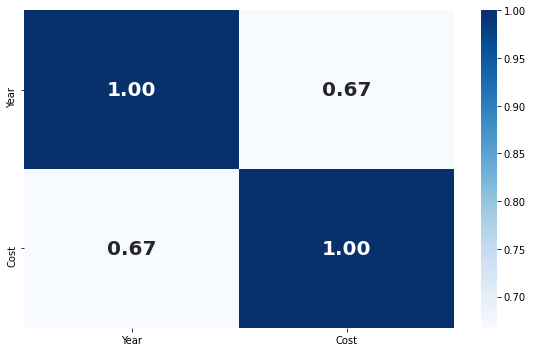

In [8]:
plt.figure(figsize=(8,5))
g = sns.heatmap(df.corr(),cmap='Blues',annot=True,fmt='.2f',annot_kws={'fontsize':20, 'fontweight': 'bold'})
plt.tight_layout();

In [9]:
sns.set_style('darkgrid')
df_lim = df.sample(n=500, random_state=42)

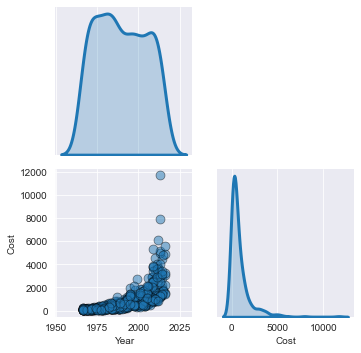

In [10]:
g = sns.PairGrid(data=df_lim,diag_sharey=False, corner=True)
g.map_diag(sns.kdeplot, fill=True, lw=3)
g.map_offdiag(sns.scatterplot, s=80, alpha=.5, ec='black')

In [11]:
unique_crops = df.Crop.unique()
print(np.sort(unique_crops))

['barley' 'castor' 'chickpea' 'cotton' 'finger millet' 'groundnut'
 'linseed' 'maize' 'pearl millet' 'pigeonpea' 'rape and mustard' 'rice'
 'seasmum' 'sorghum' 'sugarcane' 'wheat']


In [12]:
unique_states = df.State.unique()
print(np.sort(unique_states))

['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Gujarat' 'Haryana'
 'Himachal Pradesh' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Orissa' 'Punjab' 'Rajasthan' 'Tamil Nadu' 'Telangana'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [14]:
categorical_data = ['State','Crop']

for label in categorical_data:
    print(label ,': ', len(df[label].unique()))

State :  20
Crop :  16


In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ohe =  OneHotEncoder(sparse=False, handle_unknown='ignore')
stdsc = StandardScaler()
# Applying one hot encoder on crop and state column and standard scaler on Year column
ct = ColumnTransformer([('encoder', ohe, [0,1]),('scaler', stdsc,[2])], remainder = 'passthrough')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

## Pipeline

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

reg = RandomForestRegressor(n_estimators=50, random_state=0)

pipe = make_pipeline(ct, reg)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1]),
                                                 ('scaler', StandardScaler(),
                                                  [2])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50, random_state=0))])

In [18]:
y_pred = pipe.predict(X_test)

In [19]:
pipe.score(X_test, y_test)

0.9437391822374935

In [20]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test, y_pred)))

275.0967904139898


In [21]:
pipe.predict([['Maharashtra', 'maize', 2016]])[0]

1393.5530886463325

In [22]:
pipe.predict([['Madhya Pradesh', 'rice', 2014]])[0]

2589.8950370887687

In [23]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(pipe, X, y, cv=cv)

array([0.94099483, 0.94286816, 0.94205089, 0.94349153, 0.93931069])

In [24]:
import joblib

with open('../Models/price_prediction_icrisat.joblib','wb') as f:
    joblib.dump(pipe,f)